### Importing Libraies

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os

In [11]:
train_dir = r'C:\Users\PMYLS\Data Science\fer2013\train'
test_dir = r'C:\Users\PMYLS\Data Science\fer2013\test'

In [12]:
train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

### Loading and Preprocessing images

In [13]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale')

Found 28709 images belonging to 7 classes.


In [14]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale')

Found 7178 images belonging to 7 classes.


In [15]:
train_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

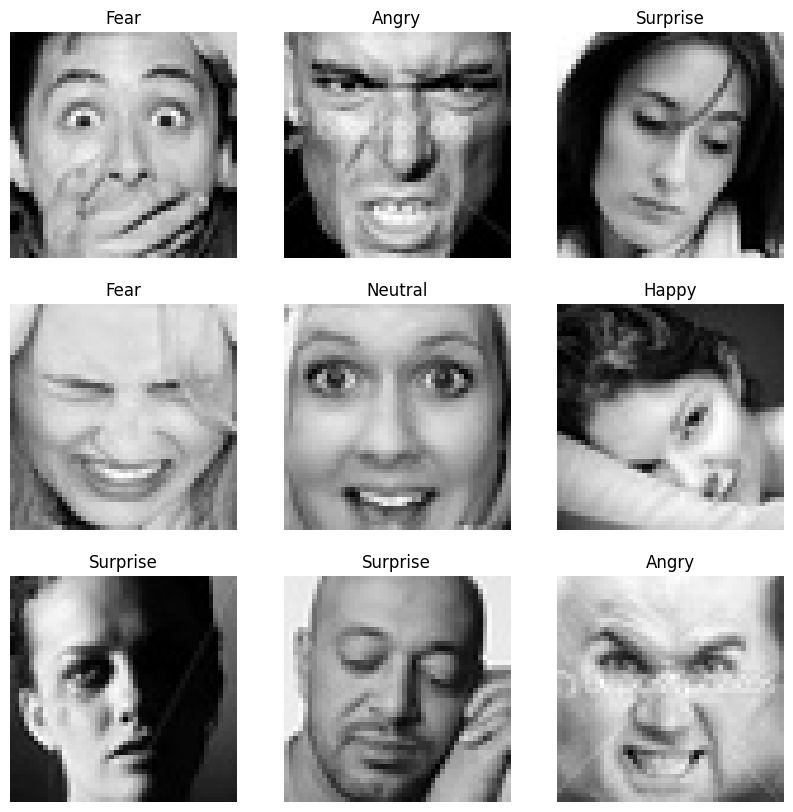

In [16]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plt.figure(figsize=(10, 10))
for images, labels in train_generator:  
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].reshape(48, 48), cmap='gray')  
        plt.title(class_labels[np.argmax(labels[i])]) 
        plt.axis("off")
    break


###  Defining the CNN Model

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

C:\Users\PMYLS\Music\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 619,911 (2.36 MB)

 Trainable params: 619,463 (2.36 MB)

 Non-trainable params: 448 (1.75 KB)

### Compiling the Model

In [10]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
               metrics=['accuracy'])

### Training the Model

In [11]:
history=model.fit(
    train_generator,
    epochs=35,
    validation_data=test_generator
)

Epoch 1/35
  2/898 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.2422 - loss: 4.5364

C:\Users\PMYLS\Music\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.3137 - loss: 1.9362 - val_accuracy: 0.4146 - val_loss: 1.4943
Epoch 2/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.4394 - loss: 1.4532 - val_accuracy: 0.4446 - val_loss: 1.4432
Epoch 3/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 58s 64ms/step - accuracy: 0.4892 - loss: 1.3390 - val_accuracy: 0.4985 - val_loss: 1.3207
Epoch 4/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 52s 58ms/step - accuracy: 0.5186 - loss: 1.2584 - val_accuracy: 0.5263 - val_loss: 1.2240
Epoch 5/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 53s 59ms/step - accuracy: 0.5449 - loss: 1.1853 - val_accuracy: 0.4947 - val_loss: 1.3158
Epoch 6/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 59s 65ms/step - accuracy: 0.5615 - loss: 1.1427 - val_accuracy: 0.4448 - val_loss: 1.4602
Epoch 7/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 52s 57ms/step - accuracy: 0.5933 - loss: 1.0669 - val_accuracy: 0.5522 - val_loss: 1.1843
Epoch 8/35
898/898 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.6131 - loss: 1.0108 - val_accurac

### Evaluating the Model

In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.5756 - loss: 2.3451
Test Accuracy: 58.39%


### Saving Model

In [13]:
model.save('emotion_detection_model.h5')

### Ploting training and validation accuracy values

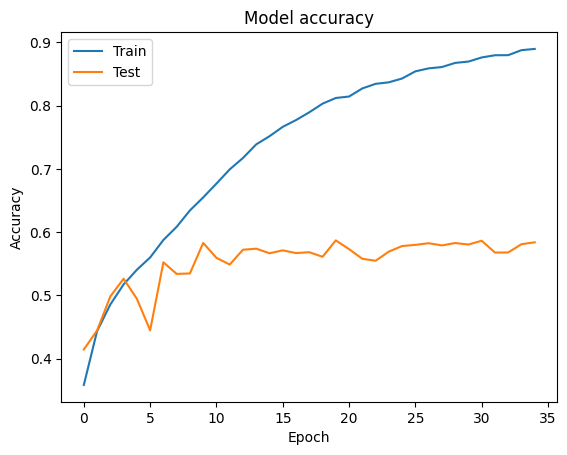

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Ploting training and validation loss values

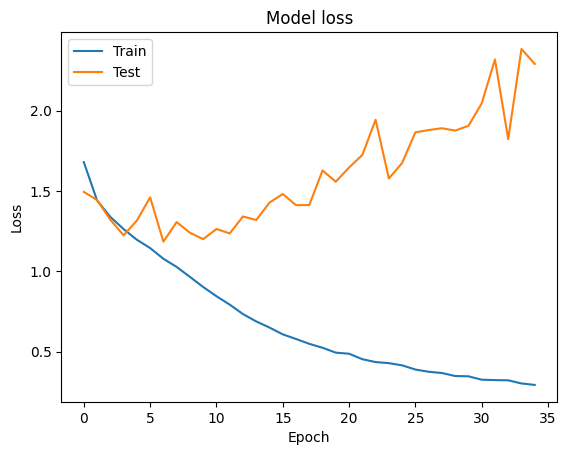

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### prediction on test data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


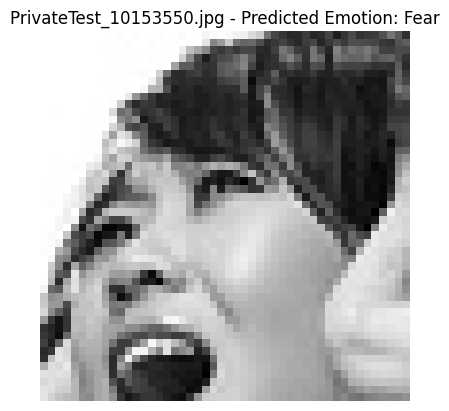

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


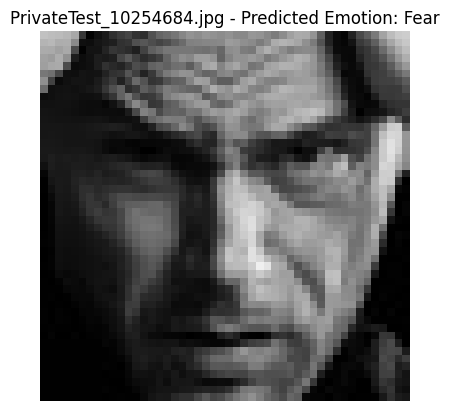

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


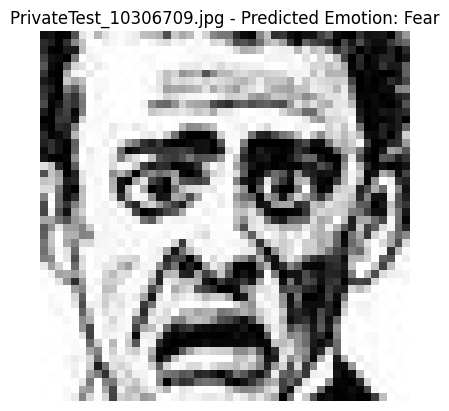

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


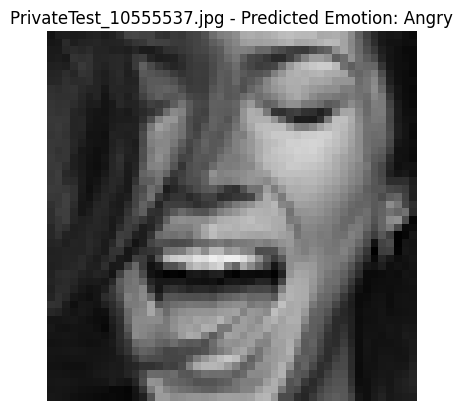

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


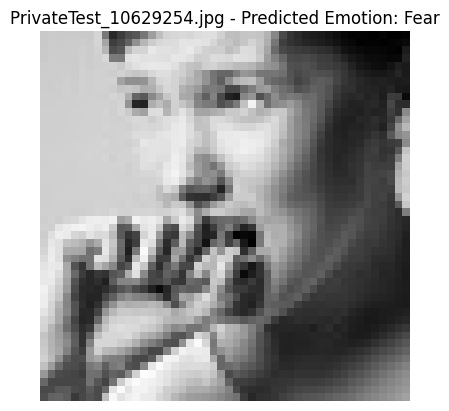

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


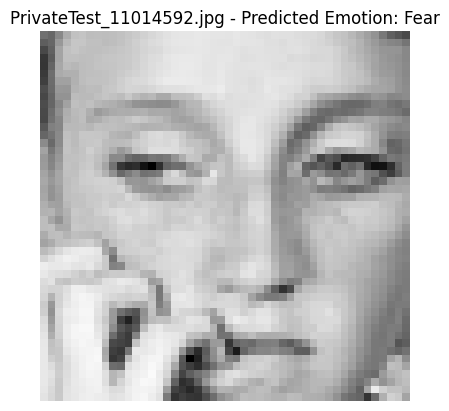

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


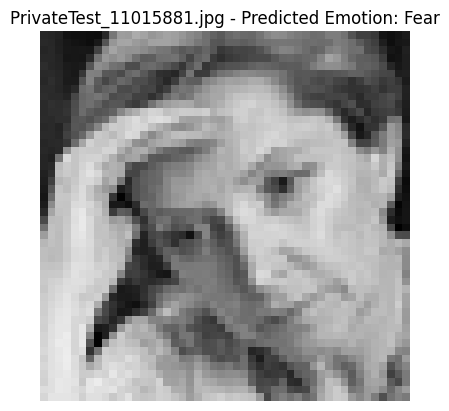

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


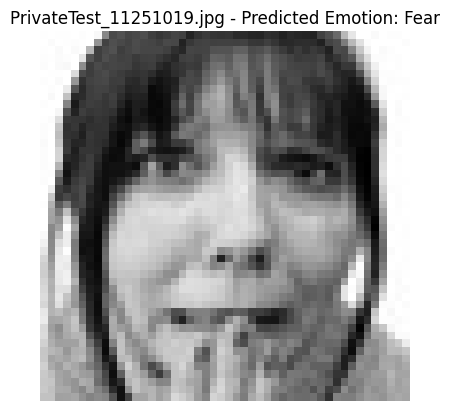

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


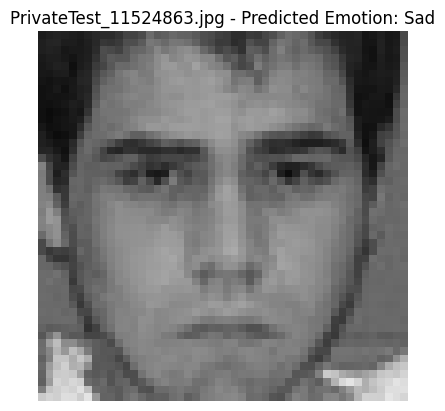

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


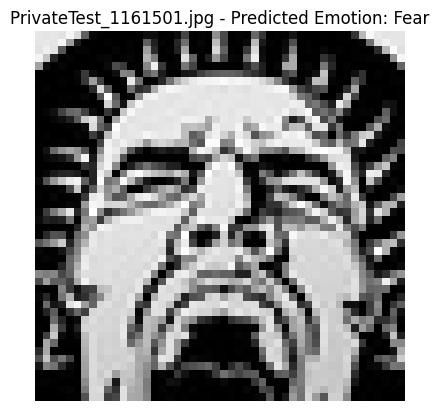

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


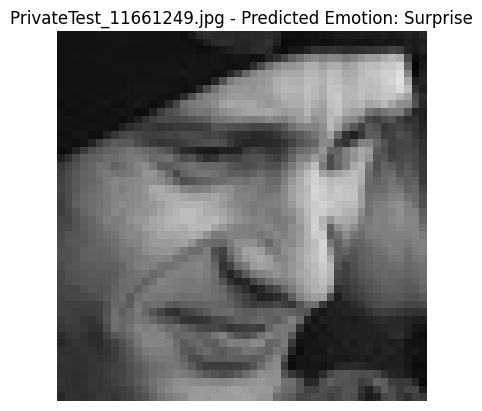

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


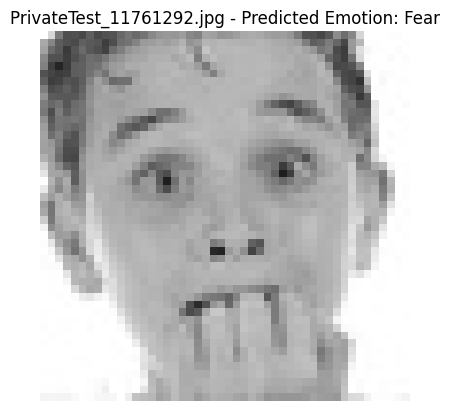

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


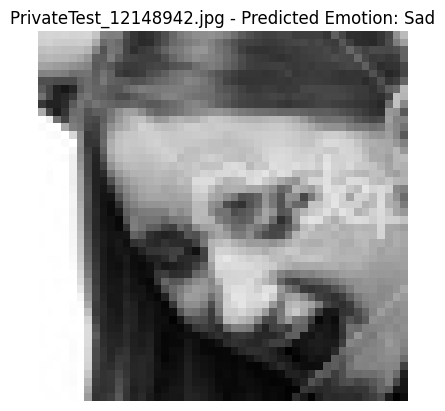

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


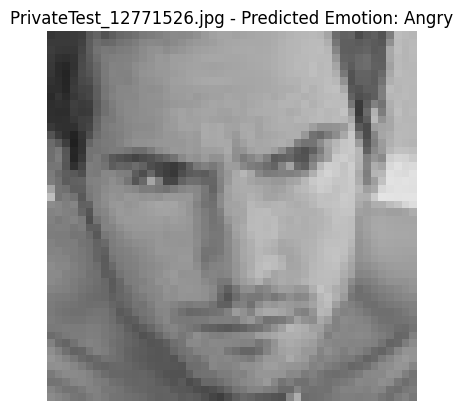

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


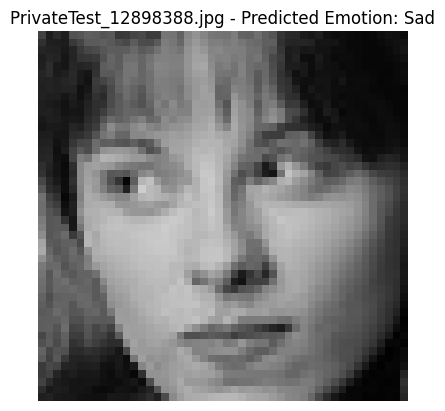

In [17]:

image_dir = r'C:\Users\PMYLS\Data Science\fer2013\test\fear'

predictions_count = 0

for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    
    if img_name.endswith(('.jpg', '.jpeg', '.png')):
        img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        predicted_emotion = class_labels[predicted_class]
        

        plt.figure()
        plt.imshow(image.load_img(img_path), cmap='gray')  
        plt.title(f'{img_name} - Predicted Emotion: {predicted_emotion}')
        plt.axis('off') 
        plt.show()  

        
        predictions_count += 1
        if predictions_count >= 15:
            break
    else:
        print(f'Skipped non-image file: {img_name}')


In [17]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.5709 - loss: 2.3769
Test Accuracy: 58.39%


## Real Time face Detection
 for exit and close camera press q.

In [8]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

from tensorflow.keras.models import load_model
emotion_model = load_model('emotion_detection_model.h5')


emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

cap = cv2.VideoCapture(0) 

if not cap.isOpened():
    print("Error: Could not access the webcam.")
    exit()

while True:
    ret, frame = cap.read()
    
    if not ret or frame is None:
        print("Error: Failed to capture frame from webcam.")
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        face = gray_frame[y:y + h, x:x + w]
        face = cv2.resize(face, (48, 48)) 
        face = face / 255.0  
        face = face.reshape(1, 48, 48, 1)  

    
        emotion_prediction = emotion_model.predict(face)
        max_index = emotion_prediction.argmax()  
        predicted_emotion = emotion_labels[max_index]  

        cv2.putText(frame, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


    cv2.imshow('Real-time Emotion Detection', frame)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━